[![Open notebook in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/afondiel/computer-vision-challenge/blob/main/L2_03_AI_Powered_Image_Restoration_and_Enhancement/notebooks/AI_Image_Restoration_Enhancement_T4_Colorization_Deoldify.ipynb)

#  AI Image Restoration and Enhancement: **Colorization** (using Deoldify)

### Overview

Add color information to grayscale images (old photos).

### Resources

- [Popular Image Colorization Datasets](https://paperswithcode.com/datasets?q=image+colorizer&v=lst&o=match)
- **Custom test Dataset:** [afondiel/dummy_images - Hugging Face](https://huggingface.co/datasets/afondiel/dummy_images)
- [SOTA Models for Colorization](https://paperswithcode.com/task/colorization)
  - Please refer to this [Benchmarking](https://github.com/afondiel/computer-vision-challenge/blob/main/L2_03_AI_Powered_Image_Restoration_and_Enhancement/docs/Image_Restoration_Enhancement_Model_Benchmark.md) to see the top SOTA models for colorization tasks.


> **IMPORTANT:**\
> For the purpose of the entire project ([**Computer Vision Challenge**](https://github.com/afondiel/computer-vision-challenge)), we leverage Pre-trained Model in order to make the project accessible to all, while focusing on the performance and outcome of multiple models.
> - We'll be using pre-trained model from **[Hugging Face Hub](https://huggingface.co/models)** (for stability and safety), Github and other **public python libraries**


### Install dependencies

In [1]:
# # Clone an entire Github repo
# !git clone https://github.com/username/RepoName.git
# %cd RepoName
# # Set up the environment
# !pip install -r requirements.txt

In [2]:
# Install HF necessary libraries
# !pip install accelerate transformers gradio datasets -U

In [3]:
# install HF datasets
!pip install datasets -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requi

In [4]:
# Install pytorch multimodality library & frameworks
!pip install torch torchvision torchaudio fastai timm -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 5.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.w

In [5]:
# Install DeOldify from the source
# !pip install git+https://github.com/jantic/DeOldify.git

!git clone https://github.com/jantic/DeOldify.git DeOldify

Cloning into 'DeOldify'...
remote: Enumerating objects: 2615, done.
remote: Counting objects: 100% (269/269), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 2615 (delta 91), reused 204 (delta 71), pack-reused 2346
Receiving objects: 100% (2615/2615), 69.71 MiB | 17.31 MiB/s, done.
Resolving deltas: 100% (1174/1174), done.


In [6]:
cd DeOldify

/content/DeOldify


In [7]:
!pip install -r requirements-colab.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.1/170.1 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.4/631.4 kB 42.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 80.7 MB/s eta 0:00:00
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654001 sha256=c9cdb271c14e67fa4451ac220ac7f1

### Import Libraries

In [19]:
# Import necessary libraries
import os
import sys
# algebra
import numpy as np
# data manipulation & analysis
import pandas as pd
# torch
import torch
import torchvision
import fastai
import timm
# deoldify
from deoldify import device
from deoldify.device_id import DeviceId
# from deoldify.visualize import *
# opencv
import cv2
# Visualization
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display
# solve bug cv2.imshow
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
# Hugging Face libraries & API
from transformers import Pipeline



### Load test datasets from  Hugging Face
> **IMPORTANT**:
> HF may require a token for secure dataset access. Follow the instructions below to load your own valid token if needed.

In [9]:
# Uncomment the line below to import necessary libraries
# from huggingface_hub import notebook_login, login

# To authenticate with Hugging Face Hub choose one of the 2 options below:

# 1. Interactive login (recommended for notebooks)
# notebook_login()  # This will open a browser window for login

# 2. Non-interactive login (if you have the token ready)
# login(token="HF_TOKEN_W")

### Preprocessing and transformations

In [10]:
def get_input_images(dataset):
  # Extract images
  image_list = []

  for idx, example in enumerate(dataset['test']):  # Assuming the dataset has a 'test' split
    id = example['index'] ## features ==> examples
    im = example['image']
    # print(id)
    # print(im)

    if isinstance(im, str):
        img = Image.open(im)
    elif isinstance(im, dict):
        img = Image.open(BytesIO(requests.get(im['path']).content))
    # Handle the case when 'im' is already a PIL Image
    elif isinstance(im, Image.Image):
        img = im
    else:
        raise ValueError("Invalid image format")

    # Append the image to the list
    image_list.append(img)
  return image_list


# Load and preprocess the image
def preprocess_image(image_path):
    # image = Image.open(image_path).convert("RGB")
    image = image_path.convert("RGB")
    image = image.resize((256, 256))
    image = np.array(image).astype(np.float32) / 255.0
    image_tensor = torch.from_numpy(image).permute(2, 0, 1).unsqueeze(0)
    return image_tensor

# Display the image
def display_image(image_tensor, title="Image"):
    image = image_tensor.squeeze(0).permute(1, 2, 0).cpu().numpy()
    image = (image * 255).astype(np.uint8)
    image_pil = Image.fromarray(image)
    image_pil.show(title=title)


In [11]:
from datasets import load_dataset, Dataset, DatasetDict

# Load custom dataset from HF
ds = load_dataset("afondiel/dummy_images")
print(ds)
# $$$ DEBUG $$$$
# print(ds.items())
# print(ds['test'])
# print(type(ds['test']))
# print(ds['test'].features['index'])
# print(ds['test'].features['image'])
# print(ds['test'].num_rows)
# print(type(ds))

INFO:datasets:PyTorch version 2.4.0 available.


PyTorch version 2.4.0 available.


INFO:datasets:Polars version 0.20.2 available.


Polars version 0.20.2 available.


INFO:datasets:TensorFlow version 2.15.0 available.


TensorFlow version 2.15.0 available.


INFO:datasets:JAX version 0.4.26 available.


JAX version 0.4.26 available.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating test split:   0%|          | 0/6 [00:00<?, ? examples/s]

DatasetDict({
    test: Dataset({
        features: ['index', 'image'],
        num_rows: 6
    })
})


#### Load your own dataset/image/photos

In [12]:
# Download the image using curl + opencv
# !curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
# !curl -o hendrix.jpg https://i.etsystatic.com/23861797/r/il/183b6d/3594587418/il_570xN.3594587418_fqp8.jpg

# # input_img = cv2.imread('logo.png')
# input_img = cv2.imread('hendrix.jpg')
# cv2_imshow(input_img)

In [46]:
# get input images
input_imgs = get_input_images(ds)
old_image = input_imgs[1]
# print(old_image)
tmp_old_file_path = 'image.jpg'
old_image.save(tmp_old_file_path)
display(tmp_old_file_path)
# display(old_image)

'image.jpg'

In [37]:
# # Upload local files
# from google.colab import files
# import io
# # from PIL import Image
# uploaded = files.upload()
# # uploaded

# # Get the filename and load the image
# for filename in uploaded.keys():
#     img_data = uploaded[filename]
#     old_image = Image.open(io.BytesIO(img_data))


### Load and prepare the model

In [14]:
# import fastai
from deoldify.visualize import *
import warnings
# import collections
# from collections import Sized
from collections.abc import Sized # Import Sized from collections.abc
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

In [15]:
# load the model
!mkdir 'models'
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth

mkdir: cannot create directory ‘models’: File exists
--2024-08-05 15:40:16--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 169.150.207.216, 2400:52e0:1500::1182:1
Connecting to data.deepai.org (data.deepai.org)|169.150.207.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  5.02MB/s    in 59s     

2024-08-05 15:41:16 (4.10 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]



In [24]:
# Set the device to use for computation
# device.set(device=DeviceId.GPU0)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(device)

print("PyTorch GPU status:")
if torch.cuda.is_available():
    print("GPU is available")
    # device = torch.device("cuda")
    # choices:  CPU, GPU0...GPU7
    device.set(device=DeviceId.GPU0)
else:
    print("GPU is not available")
    # device = torch.device("cpu")
    device.set(device=DeviceId.CPU)

# Verify the device
print(f"Using device: {device}")

PyTorch GPU status:
GPU is not available
Using device: <deoldify._device._Device object at 0x7bf9780aa590>


In [25]:
# Load the pre-trained model
colorizer = get_image_colorizer(artistic=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 175MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:134: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.


#### Setup model parameters

In [66]:
"""
- url (str): The URL of the image to transform.
- render_factor (int): Controls the quality and resolution of the output. Higher values increase the quality but require more computation.
- display_render_factor (bool): Whether to display the render factor on the plot.
- figsize (tuple): The size of the plot.
"""

# Black and White collection by @Yousuf-Karsh
# https://karsh.org/wordpress/wp-content/uploads/2017/03/Yousuf-Karsh-Muhammad-Ali-1970-1563x1960.jpg
# source_url = 'https://karsh.org/wordpress/wp-content/uploads/2017/03/Yousuf-Karsh-Muhammad-Ali-1970-1563x1960.jpg'
# source_url = 'https://resize-elle.ladmedia.fr/rcrop/638,,forcex/img/var/plain_site/storage/images/people/la-vie-des-people/news/les-photos-etonnantes-des-stars-de-philippe-halsman/marilyn-monroe-et-philippe-halsman-1959/55194592-1-fre-FR/Marilyn-Monroe-et-Philippe-Halsman-1959.jpg'
source_url = 'https://karsh.org/wordpress/wp-content/uploads/2023/12/Yousuf-KarshJohn-F-Kennedy-06-1617x1960.jpg'
# source_image_path = tmp_old_file_path
render_factor = 16
compare=True
display_render_factor = True
post_process = True
watermarked = False # True/False
# watermarked = True # True/False


#### Visualization and Analysis

In [67]:
# # Enhance the image
# source_image = tmp_old_file # PIL Image
# print(source_image)

# if source_image is not None and source_image !='':
#   # Convert the PIL Image to a NumPy array
#   image_np = np.array(source_image)
#   enhanced_image = colorizer._plot_image(
#       image = image_np, # Pass the NumPy array to _plot_image
#       render_factor=render_factor,
#       # compare=compare,
#       # watermarked=watermarked,
#       # post_process = post_process,
#       # axes=None,
#       figsize=(8,8),
#       display_render_factor=display_render_factor,

#   )
# else:
#   print('Provide an image and try again.')

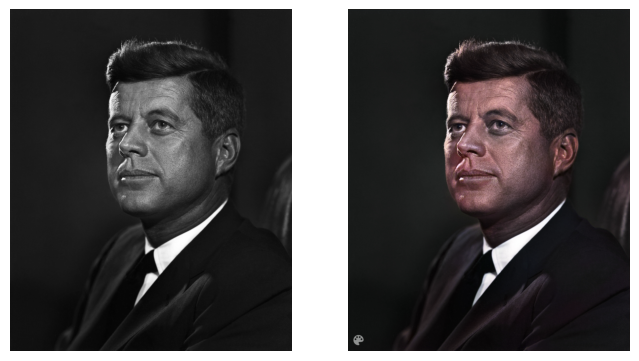

In [69]:
# plot_transformed_image_from_url gets url or path => full doc:https://github.com/jantic/DeOldify/blob/master/deoldify/visualize.py
if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(
        url=source_url,
        # path = source_image_path,
        # render_factor=render_factor,
        compare=compare,
        # watermarked=watermarked,
        display_render_factor=display_render_factor,
        # post_process = post_process,
        figsize=(8,8)
    )
      # show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

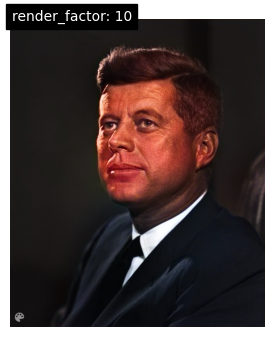

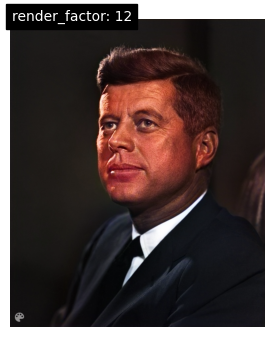

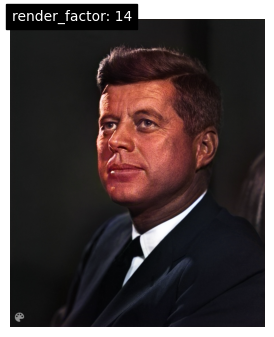

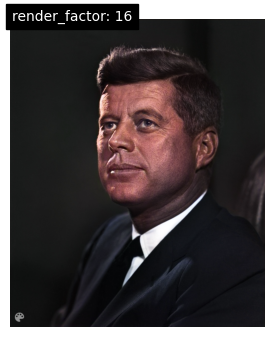

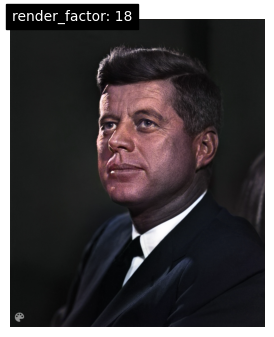

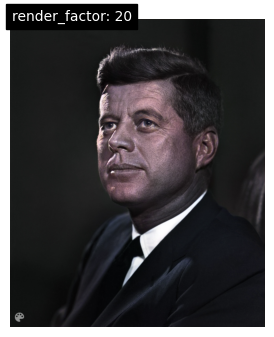

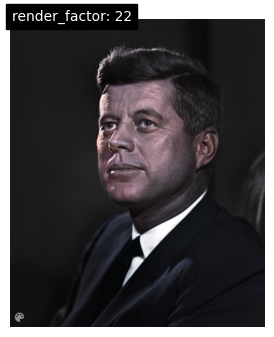

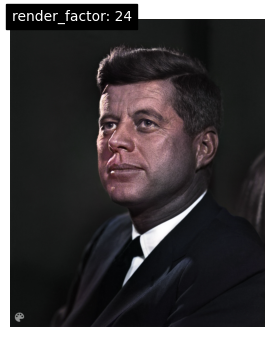

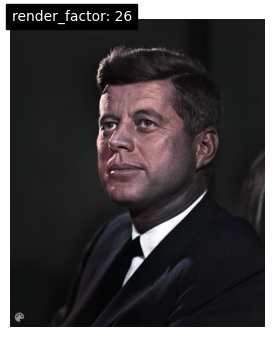

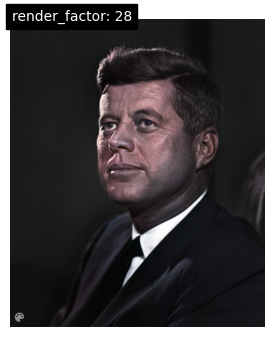

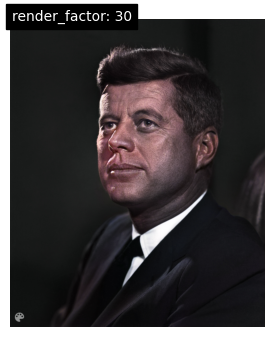

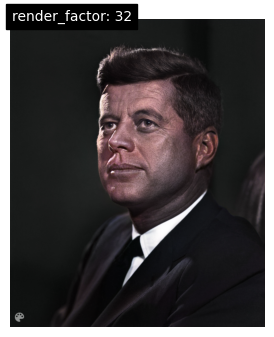

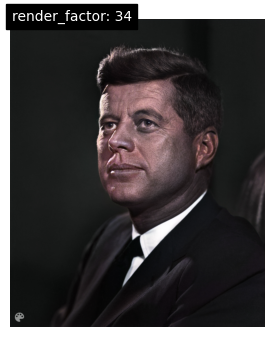

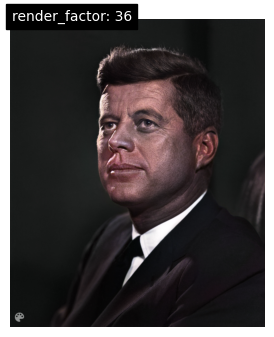

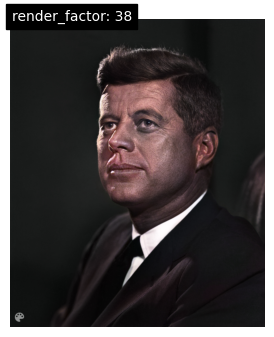

In [70]:
# Iterative display
if source_url is not None and source_url !='':
    for i in range(10,40,2):
      image_path = colorizer.plot_transformed_image_from_url(
          url=source_url,
          # path = source_image_path,
          render_factor=i, # iterative render factor
          # compare=compare,
          # watermarked=watermarked,
          display_render_factor=display_render_factor,
          figsize=(4,4)
      )
      # show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

## Demo: Try it out! 👉 [Hugging-Face Space](https://huggingface.co/spaces/afondiel/image-colorizer-deoldify)

## References

**Docs:**

- [AI Image Restoration](https://en.wikipedia.org/wiki/Image_restoration_by_artificial_intelligence)
- [Color Image Pipeline](https://en.wikipedia.org/wiki/Color_image_pipeline)


**Datasets:**

- [Popular Colorization Datasets](https://paperswithcode.com/task/colorization)

**Models:**

- [SOTA Models for Colorization](https://paperswithcode.com/task/colorization)

Deoldify:
- [deoldify.ai](https://deoldify.ai/)
  - [Demo Notebook](https://colab.research.google.com/github/jantic/DeOldify/blob/master/ImageColorizerColab.ipynb#scrollTo=663IVxfrpIAb)

**Papers:**
- [DeOldify: A Review and Implementation of an Automatic
Colorization Method - 2022](https://www.ipol.im/pub/art/2022/403/article_lr.pdf)
- [Enhancing Visual Realism: Fine-Tuning InstructPix2Pix for Advanced Image Colorization](https://arxiv.org/pdf/2312.04780v1)

**Online Tools:**
- https://www.myheritage.com
- https://deepai.org/machine-learning-model/colorizer

**Resources**
- [Yousuf Karsh Collections](https://karsh.org/photographs/)
- [Les meilleurs photographes portraitistes de tous les temps](https://independent-photo.com/fr/news/the-best-portrait-photographers/)